In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from experiments import search_best_ws_r_metric
from env_var import EPIDEMIC, MAPPINGS, EXPERIMENTS

mpl.rcParams['text.usetex'] = True
mpl.rcParams['figure.dpi']= 175
plt.style.use('default')

In [2]:
# Simulation parameters
num_age_groups = EXPERIMENTS['num_age_groups']
num_ervas = EXPERIMENTS['num_ervas']
T = EXPERIMENTS['simulate_T']
init_vacc = EXPERIMENTS['init_vacc']
taus = EXPERIMENTS['taus']
u = EXPERIMENTS['vaccines_per_day']
r_experiments = EXPERIMENTS['r_effs'] + [2.0]
t0 = EXPERIMENTS['t0']
e = EPIDEMIC['e']
search_num_ws = EXPERIMENTS['search_num_ws']

# Plot parameters
ervas_labels = EPIDEMIC['ervas_order']
age_labels = MAPPINGS['age_groups'][num_age_groups]['names']
color_palette = ["#999999", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]

In [3]:
exp_results = search_best_ws_r_metric(num_age_groups=num_age_groups,
                                      num_ervas=num_ervas,
                                      init_vacc=init_vacc,
                                      u=u,
                                      T=T,
                                      r_experiments=r_experiments,
                                      t0=t0,
                                      e=e,
                                      taus=taus,
                                      search_num_ws=search_num_ws)

Running 150 experiments with 4 CPUS.
Start (18367). Exp: 2. R: 0.75. tau: 0. Policy: 0.1111111111111111Start (18366). Exp: 1. R: 0.75. tau: 0. Policy: 0.0Start (18368). Exp: 3. R: 0.75. tau: 0. Policy: 0.2222222222222222Start (18369). Exp: 4. R: 0.75. tau: 0. Policy: 0.3333333333333333



Finished (18369). Exp: 4. Elapsed: 0:00:04.489207
Finished (18367). Exp: 2. Elapsed: 0:00:04.497760Finished (18366). Exp: 1. Elapsed: 0:00:04.493497Start (18369). Exp: 5. R: 0.75. tau: 0. Policy: 0.4444444444444444


Start (18367). Exp: 6. R: 0.75. tau: 0. Policy: 0.5555555555555556
Start (18366). Exp: 7. R: 0.75. tau: 0. Policy: 0.6666666666666666Finished (18368). Exp: 3. Elapsed: 0:00:04.537907

Start (18368). Exp: 8. R: 0.75. tau: 0. Policy: 0.7777777777777777
Finished (18366). Exp: 7. Elapsed: 0:00:03.599452
Start (18366). Exp: 9. R: 0.75. tau: 0. Policy: 0.8888888888888888
Finished (18369). Exp: 5. Elapsed: 0:00:03.666824
Start (18369). Exp: 10. R: 0.75. tau: 0. Policy: 1.0Finished (18367). Exp: 

Start (18368). Exp: 72. R: 1.25. tau: 0.5. Policy: 0.1111111111111111
Finished (18367). Exp: 29. Elapsed: 0:00:03.326617
Start (18367). Exp: 73. R: 1.25. tau: 0.5. Policy: 0.2222222222222222
Finished (18369). Exp: 30. Elapsed: 0:00:03.326805
Finished (18366). Exp: 71. Elapsed: 0:00:03.302711Start (18369). Exp: 74. R: 1.25. tau: 0.5. Policy: 0.3333333333333333

Start (18366). Exp: 75. R: 1.25. tau: 0.5. Policy: 0.4444444444444444
Finished (18368). Exp: 72. Elapsed: 0:00:03.541963
Start (18368). Exp: 76. R: 1.25. tau: 0.5. Policy: 0.5555555555555556
Finished (18367). Exp: 73. Elapsed: 0:00:04.081352
Start (18367). Exp: 77. R: 1.25. tau: 0.5. Policy: 0.6666666666666666
Finished (18369). Exp: 74. Elapsed: 0:00:03.964253
Start (18369). Exp: 78. R: 1.25. tau: 0.5. Policy: 0.7777777777777777
Finished (18366). Exp: 75. Elapsed: 0:00:03.839533
Start (18366). Exp: 79. R: 1.25. tau: 0.5. Policy: 0.8888888888888888
Finished (18368). Exp: 76. Elapsed: 0:00:03.768916
Start (18368). Exp: 80. R: 1.25.

Finished (18366). Exp: 98. Elapsed: 0:00:03.397120
Start (18366). Exp: 142. R: 2.0. tau: 1.0. Policy: 0.1111111111111111
Finished (18369). Exp: 99. Elapsed: 0:00:03.384149
Start (18369). Exp: 143. R: 2.0. tau: 1.0. Policy: 0.2222222222222222
Finished (18368). Exp: 100. Elapsed: 0:00:03.401099
Start (18368). Exp: 144. R: 2.0. tau: 1.0. Policy: 0.3333333333333333
Finished (18367). Exp: 141. Elapsed: 0:00:03.593595
Start (18367). Exp: 145. R: 2.0. tau: 1.0. Policy: 0.4444444444444444
Finished (18366). Exp: 142. Elapsed: 0:00:03.926239
Start (18366). Exp: 146. R: 2.0. tau: 1.0. Policy: 0.5555555555555556
Finished (18369). Exp: 143. Elapsed: 0:00:03.988824
Start (18369). Exp: 147. R: 2.0. tau: 1.0. Policy: 0.6666666666666666
Finished (18368). Exp: 144. Elapsed: 0:00:04.195977
Start (18368). Exp: 148. R: 2.0. tau: 1.0. Policy: 0.7777777777777777
Finished (18367). Exp: 145. Elapsed: 0:00:05.184279
Start (18367). Exp: 149. R: 2.0. tau: 1.0. Policy: 0.8888888888888888
Finished (18366). Exp: 146

In [4]:
def plot_heatmap_metric(ax, tau, metric, exp_results):
    r_results = {}
    # Parse the results and only get the ones for tau and metric
    for r, r_level in exp_results.items():
        r_results[r] = {}
        tau_results = r_level[tau]
        for w, w_level in tau_results.items():
            metric_results = w_level['results'][metric]
            metric_results = metric_results.sum()
            r_results[r][w] = metric_results
    
    r_matrix = []
    # Go over the obtained results and build a matrix
    for r, ws in r_results.items():
        matrix_row = []
        # Ensure al ws are in the same order
        ordered_ws = {k: ws[k] for k in sorted(ws.keys())}
        list_ws = list(ordered_ws.keys())
        for w_result in ordered_ws.values():
            matrix_row.append(w_result)
        matrix_row = np.array(matrix_row)
        r_matrix.append(matrix_row)
    # Transforming to numpy float array
    r_matrix = np.array(r_matrix)
    r_matrix = r_matrix.astype(np.float64)
    # Flipping rows so R_0 top values are at the beginning
    r_matrix = np.flip(r_matrix, axis=0)
    # Also reverse the list of rs
    list_rs = list(r_results.keys())
    list_rs = sorted(list_rs, reverse=True)
    
    # Get the mean of each row to get the relative change in every row
    r_matrix_means = r_matrix.mean(axis=1)
    r_matrix_means = r_matrix_means[:, np.newaxis]
    r_matrix = (r_matrix/r_matrix_means - 1)*100
    
    # Make the heatmap
    im = ax.imshow(r_matrix)
    
    # Construct the labels for the axis and add them to plot
    list_ws = ['%.2f' % round(float(w), 2) for w in list_ws]
    list_rs = ['%.2f' % round(float(r), 2) for r in list_rs]
    ax.set_xticks(np.arange(len(list_ws)))
    ax.set_yticks(np.arange(len(list_rs)))
    ax.set_xticklabels(list_ws)
    ax.set_yticklabels(list_rs)
    ax.set_ylabel("$R_0$", fontsize=18)
    ax.set_xlabel("$w_1$", fontsize=18)
    ax.set_title('Relative change in %s wrt $R_0$ row average' % (metric, ), fontsize=20)
    
    # Make the colorbar
    colorbar = ax.figure.colorbar(im, ax=ax)
    colorbar.ax.set_ylabel('Change in %s' % (metric, ), rotation=-90, va='bottom', fontsize=16)


    # Also include the numbers in every square
    for i in range(len(list_rs)):
        for j in range(len(list_ws)):
            round_text = '%.2f' % round(r_matrix[i, j], 2)
            text = ax.text(j, i, round_text,
                           ha="center", va="center", color="w")
    
    return ax

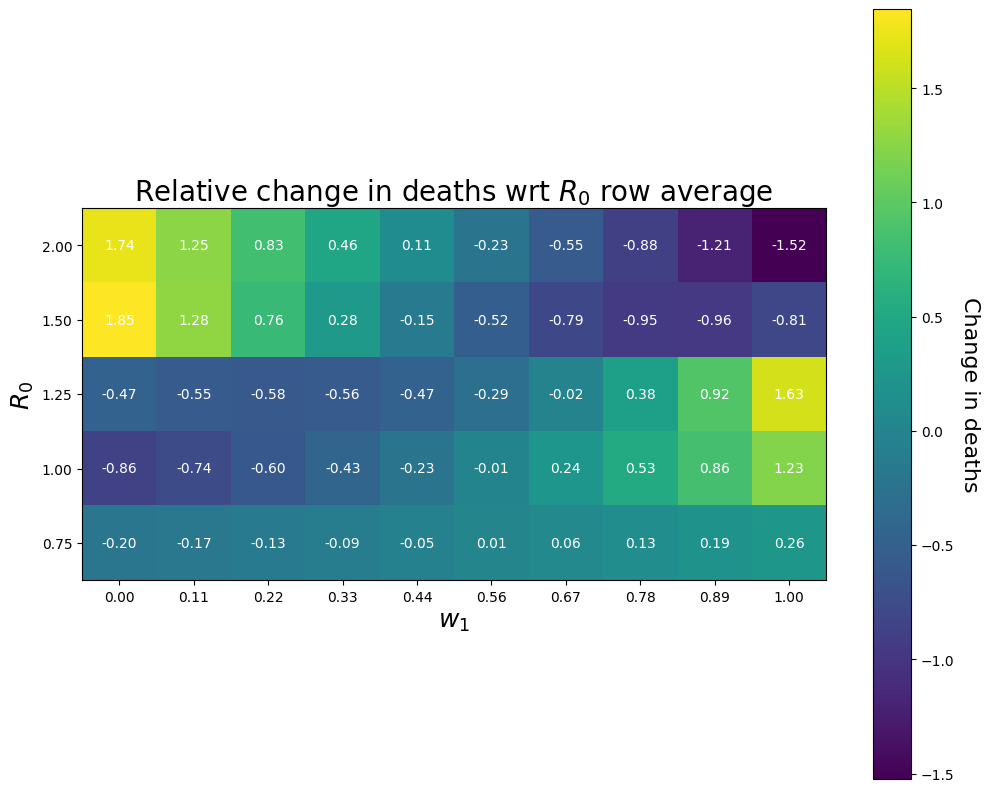

In [5]:
fig, ax = plt.subplots(figsize=(12, 10))
ax = plot_heatmap_metric(ax=ax, tau=0.5, metric='deaths', exp_results=exp_results)

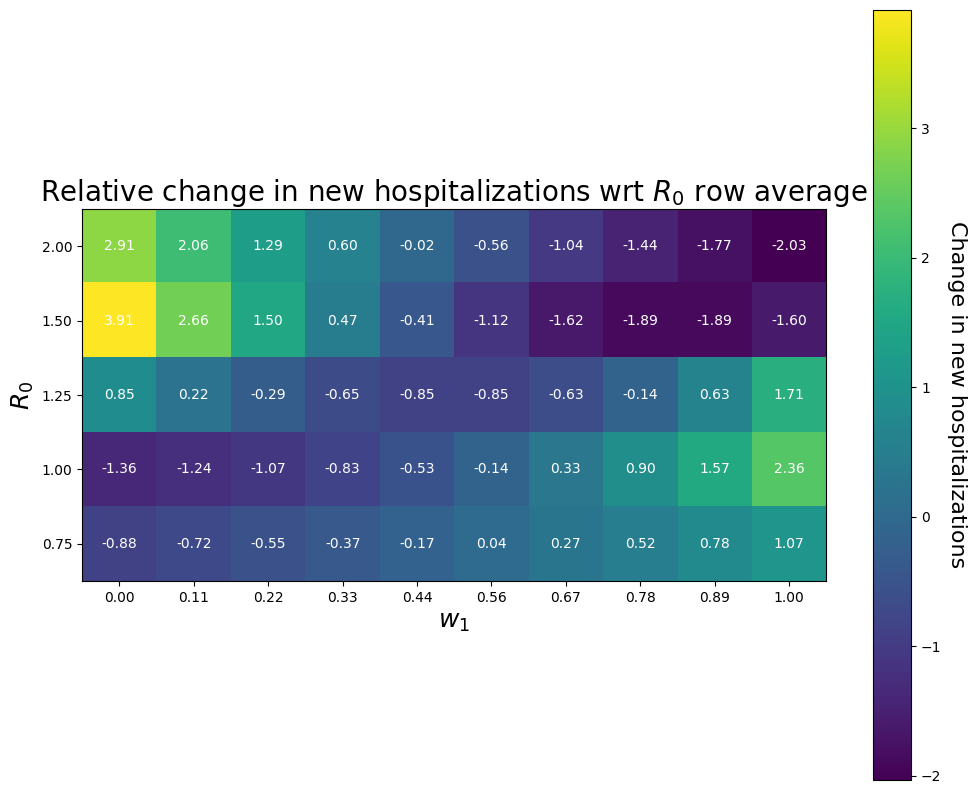

In [7]:
fig, ax = plt.subplots(figsize=(12, 10))
ax = plot_heatmap_metric(ax=ax, tau=0.5, metric='new hospitalizations', exp_results=exp_results)

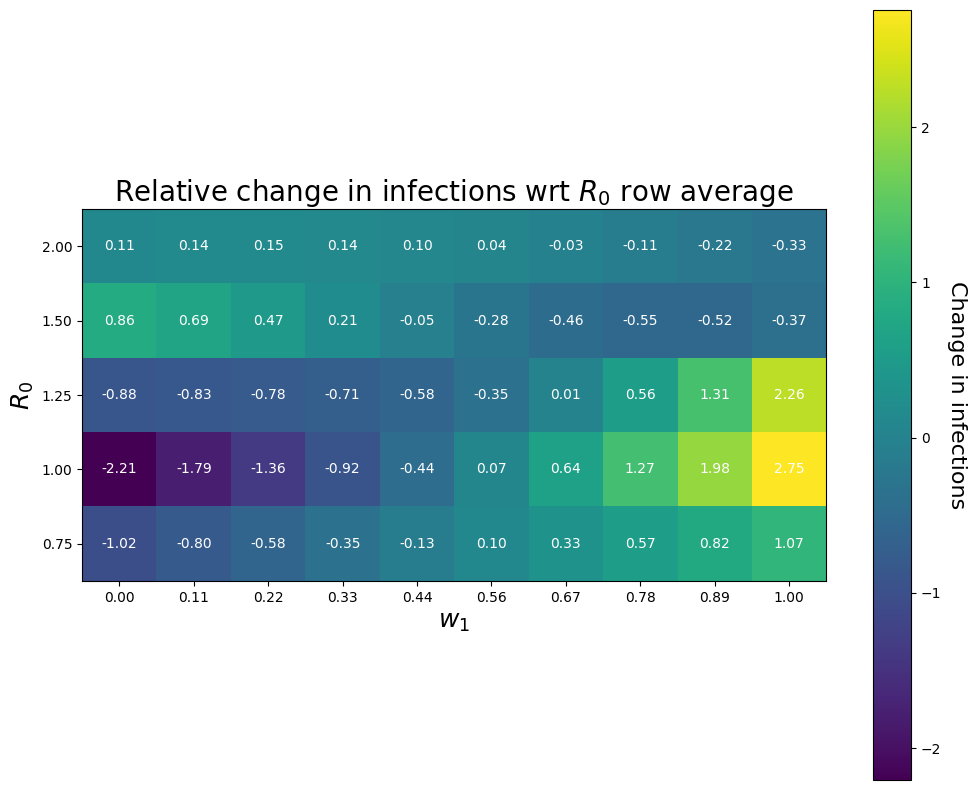

In [6]:
fig, ax = plt.subplots(figsize=(12, 10))
ax = plot_heatmap_metric(ax=ax, tau=0.5, metric='infections', exp_results=exp_results)